Q1. What is meant by time-dependent seasonal components?

Time-dependent seasonal components refer to patterns in time series data that repeat at regular intervals but with varying characteristics over time. These patterns are often influenced by seasons, holidays, or other recurring events, and their impact on the data changes as time progresses.

For example, in a retail sales dataset, a time-dependent seasonal component might show that sales increase every December due to the holiday season. However, the extent of the increase may vary each year depending on factors like economic conditions, marketing campaigns, or changes in consumer behavior.

Key characteristics of time-dependent seasonal components include:

1. **Changing Amplitude**: The magnitude of the seasonal effect can change over time. For example, the increase in sales during the holiday season could grow larger or smaller from year to year.

2. **Changing Frequency**: Although the seasonal period remains consistent (e.g., annual or quarterly), the timing of peaks and troughs within the season can shift slightly.

3. **Non-stationary Behavior**: Unlike stationary seasonal components, which remain constant over time, time-dependent seasonal components exhibit changes that make them non-stationary.

Understanding and modeling time-dependent seasonal components is crucial for accurate forecasting, as it allows for capturing more dynamic and realistic patterns in time series data. Advanced techniques like **Seasonal Decomposition of Time Series** (STL), **Fourier Transform**, or **Wavelet Transform** are often used to analyze and predict these components.

##  Example Program to Analyze Time-Dependent Seasonal Components


In [14]:
## Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


In [15]:
# Load the Time Series Data We'll use a sample dataset, which you can replace with your own time series data.

# Example dataset
date_rng = pd.date_range(start='1/1/2020', end='31/12/2022', freq='D')
np.random.seed(42)
data = pd.DataFrame(date_rng, columns=['date'])
data['value'] = 100 + np.sin(2 * np.pi * data.index / 365) * 10 + np.random.normal(0, 2, size=(len(date_rng)))

# Introduce some time-dependent changes
data.loc[365:730, 'value'] += np.sin(2 * np.pi * data.loc[365:730].index / 365) * 5

data.set_index('date', inplace=True)


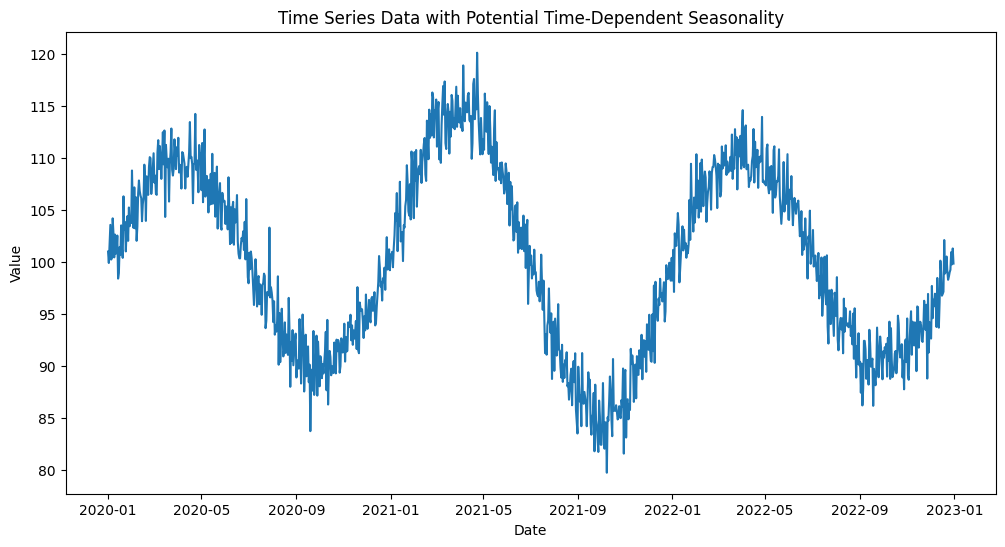

In [16]:
# Visualize the Data To identify time-dependent seasonal patterns, plotting the data is essential.

plt.figure(figsize=(12, 6))
plt.plot(data['value'])
plt.title('Time Series Data with Potential Time-Dependent Seasonality')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


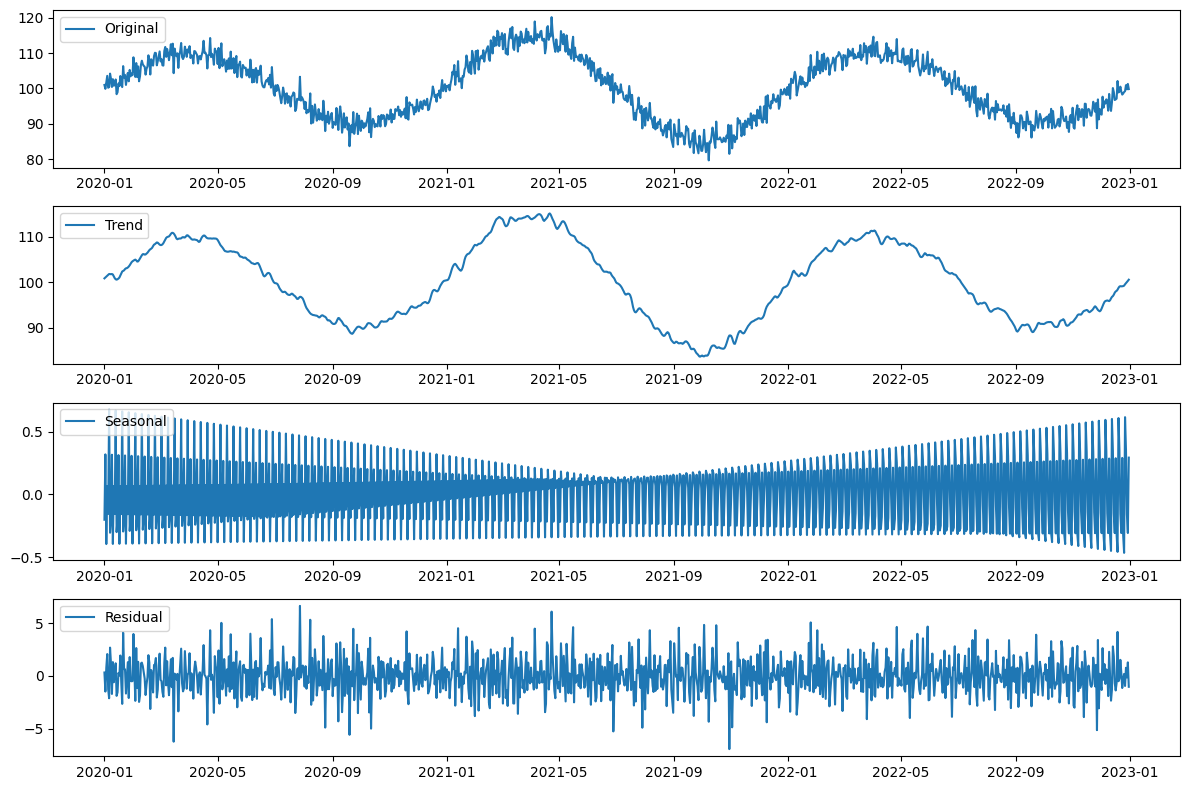

In [17]:
# Apply Seasonal Decomposition Using STL decomposition to decompose the time series into trend, seasonal, and residual components.

stl = STL(data['value'], seasonal=365, robust=True)
result = stl.fit()

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['value'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


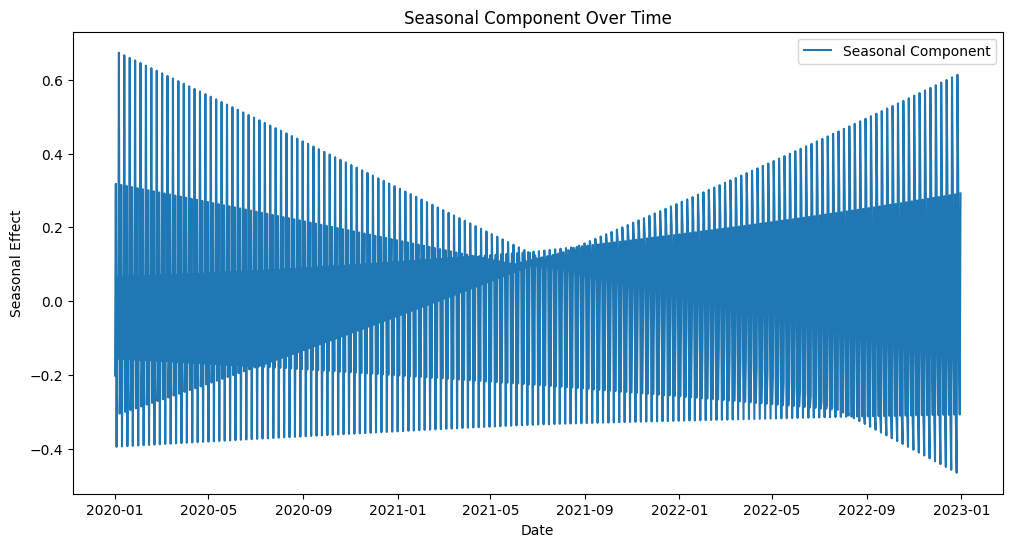

In [18]:
# Analyze the Seasonal Component The seasonal component should show repeating patterns. If these patterns vary in amplitude or frequency over time, it indicates time-dependent seasonality.

plt.figure(figsize=(12, 6))
plt.plot(result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component Over Time')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.show()


Conclusion and Interpretation Observing the seasonal plot, if you notice the amplitude or the shape of the seasonal component changes over time, this is indicative of time-dependent seasonality. Analyzing such components can help in making better predictions and understanding the underlying dynamics of the data.



## Conclusion

Time-dependent seasonal components are important for understanding dynamic patterns in time series data. By decomposing the data using methods like STL, you can identify and interpret these components effectively. This knowledge is crucial for forecasting and making data-driven decisions.



Q2. How can time-dependent seasonal components be identified in time series data?



To identify time-dependent seasonal components in time series data, you can use several techniques. These components are patterns that repeat at regular intervals over time, such as daily, weekly, monthly, or yearly cycles. Here are some common methods to identify and analyze these seasonal components:

### 1. **Visual Inspection**
   - **Plot the Time Series**: Start by plotting the time series data. Look for patterns that repeat over a consistent interval. For example, a spike every 12 months might suggest a yearly seasonal component.
   - **Seasonal Decomposition**: Use tools like Seasonal Decomposition of Time Series (STL or classical decomposition) to break down the series into trend, seasonal, and residual components. This can help visualize the seasonality more clearly.

### 2. **Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)**
   - **ACF Plot**: The autocorrelation function measures how data points in a series are related to previous points. Peaks at regular lags (e.g., every 12 months or 7 days) in an ACF plot indicate the presence of seasonality.
   - **PACF Plot**: Similar to ACF, but it accounts for the correlations of residuals. It helps to determine the seasonal order in autoregressive models.

### 3. **Seasonal Decomposition Techniques**
   - **Additive and Multiplicative Models**: These models assume that the time series is composed of a trend, seasonality, and noise. An additive model assumes that the seasonal variations are constant over time, while a multiplicative model assumes that these variations change proportionally to the level of the series.
   - **STL Decomposition**: STL (Seasonal and Trend decomposition using Loess) is a robust method that allows decomposition into seasonal, trend, and residual components. It can handle more complex seasonal patterns and is less sensitive to outliers.

### 4. **Fourier Analysis**
   - **Fourier Transform**: This method transforms the time series from the time domain to the frequency domain, helping to identify dominant cycles or frequencies. Peaks in the Fourier spectrum indicate significant periodic components, revealing the seasonality.

### 5. **Time Series Models**
   - **SARIMA (Seasonal Autoregressive Integrated Moving Average)**: This model extends ARIMA to support seasonality. The seasonal component is defined by additional parameters in the model, specifically tuned to capture seasonal trends.
   - **Exponential Smoothing State Space Model (ETS)**: This model considers different combinations of error, trend, and seasonal components, allowing for multiplicative or additive seasonal effects.

### 6. **Machine Learning Approaches**
   - **Machine Learning Models**: Models like Random Forest, Gradient Boosting Machines, and Neural Networks (e.g., LSTM for sequential data) can capture complex seasonality patterns without explicitly modeling them. These models learn the seasonal components implicitly from the data.

### 7. **Rolling Statistics and Moving Averages**
   - **Moving Averages**: Calculate moving averages over different seasonal windows (e.g., 12 months, 7 days) to smooth the series and highlight seasonal trends.
   - **Rolling Statistics**: Compute rolling mean and standard deviation to observe changes over time. Seasonal components can be inferred if the rolling statistics show cyclical patterns.

### 8. **Domain Knowledge and External Indicators**
   - **Use of External Data**: Incorporating external variables like holidays, weather data, or economic indicators can help identify seasonality that aligns with external cycles.
   - **Domain Expertise**: Understanding the context of the data can provide insights into potential seasonal patterns (e.g., increased sales during holidays or weekends).

By combining these methods, you can effectively identify and analyze time-dependent seasonal components in time series data.

Q3. What are the factors that can influence time-dependent seasonal components?

Time-dependent seasonal components in time series data can be influenced by several factors, including:

1. **External Events**: Holidays, festivals, or special events (e.g., Black Friday) can cause spikes or drops in data, impacting seasonal patterns.

2. **Climate and Weather Changes**: Seasonal weather patterns, such as colder winters or hotter summers, can influence activities like retail sales, energy consumption, and travel.

3. **Economic Conditions**: Economic factors such as inflation, recession, or changes in consumer behavior can affect seasonal trends.

4. **Technological Advancements**: The introduction of new technologies or platforms can shift consumer behavior, altering established seasonal patterns.

5. **Policy and Regulatory Changes**: Changes in laws, regulations, or governmental policies can impact industries seasonally (e.g., tax law changes affecting financial services).

6. **Cultural Shifts**: Changes in societal norms or values can influence the timing and magnitude of seasonal activities, such as changes in holiday shopping habits.

7. **Demographic Changes**: Shifts in population demographics, such as aging populations or migration patterns, can affect seasonal demand in certain sectors.

8. **Market Competition**: Entry or exit of competitors, or changes in competitive strategies, can impact the seasonality of a product or service.

9. **Supply Chain Dynamics**: Disruptions or changes in the supply chain, such as raw material availability, can influence seasonal production and sales patterns.

10. **Pandemics or Crises**: Health crises like the COVID-19 pandemic can drastically alter seasonal trends by affecting mobility, consumer behavior, and overall demand.

Python Program to Analyze Seasonal Components


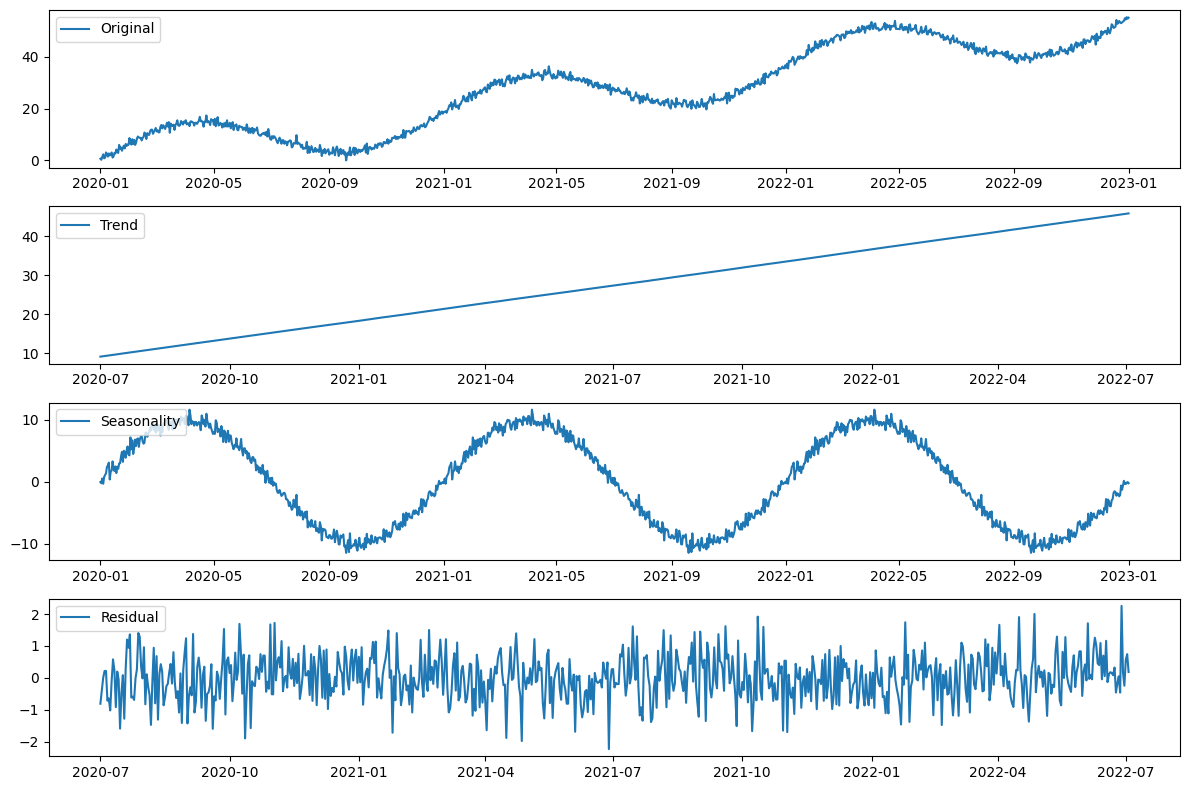

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a time series with daily data for 3 years
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', end='2023-01-01', freq='D')
data = np.random.normal(loc=0, scale=1, size=len(date_range))

# Simulate a seasonal effect: Adding sinusoidal components to mimic seasonality
seasonal_effect = 10 * np.sin(2 * np.pi * date_range.dayofyear / 365)
data += seasonal_effect

# Simulate a trend component
trend_effect = 0.05 * (np.arange(len(date_range)))
data += trend_effect

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(df['Value'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Q4. How are autoregression models used in time series analysis and forecasting?

Autoregression (AR) models are a fundamental tool in time series analysis and forecasting.
 They are based on the idea that the value of a variable at a given time is linearly dependent on its previous values.
 Here's a breakdown of how autoregression models are used in time series analysis and forecasting:

### 1. **Understanding Autoregression Models**

An autoregression (AR) model predicts future values based on past values in a time series. The model assumes a linear relationship between the current value and one or more prior values (lags). The general form of an AR model of order \( p \) (AR(\( p \))) can be expressed as:

\[
Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \ldots + \phi_p Y_{t-p} + \epsilon_t
\]

where:
- \( Y_t \) is the value of the time series at time \( t \).
- \( \phi_1, \phi_2, \ldots, \phi_p \) are the coefficients that measure the influence of the past \( p \) values.
- \( \epsilon_t \) is a white noise error term (i.e., a random error with a mean of zero and constant variance).

### 2. **Steps to Build an Autoregression Model**

#### a. **Data Preparation**
- **Stationarity**: For AR models, it's important that the time series is stationary, meaning its statistical properties (mean, variance) do not change over time. If the series is not stationary, transformations like differencing or logarithmic scaling may be applied.
- **Lag Selection**: Determine the number of lags (order \( p \)) to use in the model. This can be done using criteria like the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or by examining autocorrelation and partial autocorrelation plots (ACF and PACF).

#### b. **Model Fitting**
- Fit the AR model to the historical time series data using a method like Ordinary Least Squares (OLS) to estimate the coefficients \( \phi_1, \phi_2, \ldots, \phi_p \).

#### c. **Model Diagnostics**
- Check the residuals (errors) of the model to ensure they resemble white noise (uncorrelated, normally distributed with a mean of zero). This can be assessed using ACF plots of the residuals, the Ljung-Box test, or similar methods.

### 3. **Forecasting with Autoregression Models**

Once the AR model is fitted and validated, it can be used to forecast future values of the time series:

- **Point Forecasting**: Use the estimated coefficients and the known values of the time series up to the current point to calculate future values. For example, a 1-step ahead forecast is simply the linear combination of the past \( p \) values and their respective coefficients.
  
- **Interval Forecasting**: Besides point forecasts, AR models can also provide confidence intervals for the forecasts, which give a range within which the future values are expected to fall, considering the uncertainty.

### 4. **Applications of Autoregression Models**

AR models are widely used in various fields for time series forecasting:

- **Economics and Finance**: Predicting stock prices, interest rates, or GDP growth.
- **Meteorology**: Forecasting weather conditions such as temperature and rainfall.
- **Demand Forecasting**: Predicting future sales, electricity demand, or resource allocation.

### 5. **Extensions and Variations**

- **Autoregressive Integrated Moving Average (ARIMA) Models**: AR models are often combined with other components like differencing (to achieve stationarity) and moving averages to form ARIMA models, which are more flexible and capable of modeling a broader range of time series patterns.
  
- **Seasonal Autoregressive Integrated Moving Average (SARIMA) Models**: SARIMA models extend ARIMA to account for seasonality, which is common in many time series data.

- **Vector Autoregression (VAR) Models**: For multivariate time series data where multiple variables influence each other, VAR models are used, which generalize AR models to handle multiple time series simultaneously.

### 6. **Benefits and Limitations**

#### **Benefits**:
- **Simplicity**: AR models are relatively simple to understand and implement.
- **Interpretability**: The coefficients provide insights into the influence of past values on future values.
- **Efficiency**: Effective for short-term forecasting when the series is stationary and there is a strong autocorrelation in the data.

#### **Limitations**:
- **Stationarity Requirement**: The need for stationarity can be a limitation if the time series exhibits trends or seasonality.
- **Limited to Linear Relationships**: AR models assume a linear relationship, which may not always capture complex patterns in the data.
- **Overfitting Risk**: Choosing too many lags can lead to overfitting, where the model fits the noise rather than the underlying pattern.

### Conclusion

Autoregression models are a cornerstone of time series analysis, providing a straightforward approach to modeling and forecasting time-dependent data based on historical values. While they have limitations, their simplicity and ease of interpretation make them a powerful tool, particularly when the assumptions of stationarity and linearity are met.

Q5. How do you use autoregression models to make predictions for future time points?

Autoregression (AR) models are a type of time series model used to predict future values based on past observations. The basic idea of autoregression is that the value of a time series at a particular time point can be predicted as a linear combination of its past values.

### Steps to Use Autoregression Models for Future Predictions

1. **Understanding the Autoregressive Model (AR(p))**:
   - An AR model of order `p` (AR(p)) assumes that the current value of the time series depends linearly on its `p` previous values.
   - The AR(p) model can be written as:
   \[
   y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t
   \]
   where:
   - \(y_t\) is the current value of the time series.
   - \(c\) is a constant.
   - \(\phi_1, \phi_2, \ldots, \phi_p\) are the parameters (coefficients) of the model.
   - \(\epsilon_t\) is the white noise error term at time \(t\).

2. **Stationarity Check**:
   - Before fitting an AR model, the time series data must be stationary, meaning its statistical properties (like mean and variance) do not change over time.
   - Use techniques like the Augmented Dickey-Fuller (ADF) test to check for stationarity.
   - If the time series is not stationary, apply transformations like differencing, log transformation, or seasonal decomposition to make it stationary.

3. **Determine the Order (p) of the AR Model**:
   - The order \(p\) of the AR model specifies the number of lagged observations to include in the model.
   - Use criteria like the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or Partial Autocorrelation Function (PACF) plots to select the optimal value of \(p\).

4. **Fit the AR Model**:
   - Using the selected order \(p\), fit the AR model to the stationary time series data.
   - You can use libraries like `statsmodels` in Python to fit the AR model:
   ```python
   from statsmodels.tsa.ar_model import AutoReg

   model = AutoReg(time_series_data, lags=p)
   model_fit = model.fit()
   ```

5. **Make Predictions**:
   - Once the model is trained, use it to make predictions for future time points.
   - You can use the `predict()` function to generate predictions.
   ```python
   # Predict the next 5 future time points
   future_predictions = model_fit.predict(start=len(time_series_data), end=len(time_series_data) + 4)
   ```

6. **Evaluate Model Performance**:
   - Evaluate the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) by comparing the predicted values against a test set or actual future observations.

7. **Iterate and Refine**:
   - Depending on the performance, refine the model by tuning the parameters or transforming the data further.



### Conclusion
Autoregression models are a simple yet powerful tool for time series forecasting. The key steps involve checking for stationarity, selecting the appropriate lag order, fitting the model, and making future predictions. Depending on the complexity of the data, additional preprocessing and model tuning may be necessary to achieve the best results.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [2]:
# Example time series data
data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
        115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
        145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
        171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
        196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
        204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
        242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
        284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
        315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
        340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
        360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
        417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]

In [3]:
# Convert data to a pandas series
series = pd.Series(data)

In [11]:
series.count()

144

In [4]:
# Define the lag value
p = 3  # Let's assume we determined this from the PACF plot

In [5]:
# Fit the AR model
model = AutoReg(series, lags=p)
model_fit = model.fit()

In [6]:
# Print the coefficients
print(f'Coefficients: {model_fit.params}')

Coefficients: const    13.640997
y.L1      1.348229
y.L2     -0.591842
y.L3      0.201825
dtype: float64


In [7]:
# Make predictions
predictions = model_fit.predict(start=len(series), end=len(series) + 4)
print(f'Predictions: {predictions}')

Predictions: 144    458.298818
145    454.568722
146    442.451613
147    433.630363
148    428.155883
dtype: float64


Q6. What is a moving average (MA) model and how does it differ from other time series models?

A **Moving Average (MA) model** is a time series model that is used to forecast future values based on past errors (or shocks). It is part of the broader class of **Autoregressive Integrated Moving Average (ARIMA)** models, which are widely used in time series analysis and forecasting.

### Moving Average (MA) Model

In the context of time series analysis, an **MA(q) model** (where "q" denotes the order of the model) expresses the value of a time series as a linear combination of past forecast errors.

The general form of an MA model of order \(q\) is:

\[
X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
\]

where:
- \(X_t\) is the actual value of the time series at time \(t\).
- \(\mu\) is the mean of the series.
- \(\epsilon_t\) is the white noise error term at time \(t\).
- \(\theta_1, \theta_2, \ldots, \theta_q\) are the parameters of the model that need to be estimated.
- \(\epsilon_{t-1}, \epsilon_{t-2}, \ldots, \epsilon_{t-q}\) are the past error terms (also known as residuals).

The **MA model** relies on the idea that the current value of the series is affected by the random shocks (errors) from the past. Unlike some models that rely on past values of the series itself, the MA model is concerned with past errors.

### Differences from Other Time Series Models

1. **Autoregressive (AR) Model**:
   - An **AR(p) model** (where "p" denotes the order) expresses the value of a time series as a linear combination of its own past values.
   - Form: \(X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t\)
   - Key Difference: The AR model uses past values of the series (lags of the series itself) to predict the current value, whereas the MA model uses past error terms.

2. **Autoregressive Moving Average (ARMA) Model**:
   - An **ARMA(p, q) model** combines both AR and MA models. It uses both past values of the series and past errors to predict future values.
   - Form: \(X_t = c + \phi_1 X_{t-1} + \cdots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}\)
   - Key Difference: ARMA models incorporate both the autocorrelation and moving average aspects, whereas MA models only consider the moving average component (i.e., past errors).

3. **Autoregressive Integrated Moving Average (ARIMA) Model**:
   - An **ARIMA(p, d, q) model** is an extension of ARMA that is used for non-stationary time series. It includes a differencing step (order \(d\)) to make the series stationary.
   - Form: Differencing is applied to make the series stationary, and then an ARMA model is applied.
   - Key Difference: ARIMA models handle non-stationary data by incorporating differencing, whereas MA models do not inherently address non-stationarity.

4. **Exponential Smoothing Models**:
   - Exponential Smoothing models forecast future values based on weighted averages of past observations, where the weights decrease exponentially as observations get older.
   - Key Difference: Exponential smoothing does not use a linear combination of past errors or past values; instead, it focuses on weighted averages, which differ conceptually and mathematically from MA models.

### Summary

The **Moving Average (MA) model** is unique in that it specifically uses past errors to model the time series, rather than past values of the series itself. It is particularly useful when the effect of a shock diminishes over time and is commonly used when the time series is stationary. The main difference between MA models and other time series models lies in the source of information they use to forecast future values—MA models rely on past errors, while AR models rely on past values, and ARMA/ARIMA models combine both past values and past errors (and also differencing for ARIMA to handle non-stationarity).

Q7. What is a mixed ARMA model and how does it differ from an AR or MA model?

A mixed ARMA (AutoRegressive Moving Average) model is a statistical model used for analyzing and forecasting time series data. It combines two components: the AutoRegressive (AR) part and the Moving Average (MA) part. Let's break down what each component is and then explain how the mixed ARMA model differs from pure AR or MA models.

### AR Model (AutoRegressive Model)
An **AR(p) model** is an autoregressive model of order \( p \), which means it predicts the value of a time series based on its previous \( p \) values. The model can be written as:

\[
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \epsilon_t
\]

where:
- \( X_t \) is the value of the series at time \( t \).
- \( \phi_1, \phi_2, \ldots, \phi_p \) are the parameters of the model.
- \( \epsilon_t \) is white noise (random error term).

The AR model assumes that the current value of the series can be explained as a linear combination of its past values plus some random noise.

### MA Model (Moving Average Model)
An **MA(q) model** is a moving average model of order \( q \), which means it models the value of a time series as a linear combination of past error terms (or shocks). The model can be written as:

\[
X_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \ldots + \theta_q \epsilon_{t-q} + \epsilon_t
\]

where:
- \( X_t \) is the value of the series at time \( t \).
- \( \mu \) is the mean of the series.
- \( \theta_1, \theta_2, \ldots, \theta_q \) are the parameters of the model.
- \( \epsilon_t, \epsilon_{t-1}, \ldots, \epsilon_{t-q} \) are white noise terms.

The MA model assumes that the current value of the series can be explained as a linear combination of past random shocks (errors).

### Mixed ARMA Model (AutoRegressive Moving Average Model)
A **mixed ARMA(p, q) model** combines both the AR(p) and MA(q) components, meaning it uses both past values and past errors to model the current value of the time series. The ARMA model can be written as:

\[
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \ldots + \theta_q \epsilon_{t-q}
\]

where:
- \( \phi_1, \phi_2, \ldots, \phi_p \) are the parameters of the AR part.
- \( \theta_1, \theta_2, \ldots, \theta_q \) are the parameters of the MA part.
- The other terms are as defined in the AR and MA models.

### Key Differences Between AR, MA, and ARMA Models

1. **Model Components**:
   - **AR Model**: Only includes past values (lags) of the series.
   - **MA Model**: Only includes past errors (lags of the residuals).
   - **ARMA Model**: Includes both past values and past errors.

2. **Model Flexibility**:
   - **AR Model**: Suitable when the time series is primarily influenced by its past values.
   - **MA Model**: Suitable when the time series is primarily influenced by past random shocks or errors.
   - **ARMA Model**: More flexible, as it can handle both aspects, making it more suitable for time series that exhibit both autoregressive and moving average characteristics.

3. **Lag Structure**:
   - **AR Model**: Uses a lag structure based on past observations.
   - **MA Model**: Uses a lag structure based on past errors.
   - **ARMA Model**: Combines both lag structures, providing a more comprehensive framework for modeling a wide variety of time series behaviors.

4. **Stationarity**:
   - All three models typically require the time series to be stationary (i.e., its statistical properties do not change over time). However, ARMA models are often used after transforming non-stationary series to achieve stationarity.

### Summary
The mixed ARMA model combines the strengths of both AR and MA models, allowing for a more comprehensive analysis of time series data that exhibits both autoregressive and moving average characteristics. It is particularly useful when a time series is influenced by both its past values and past errors, offering a more flexible approach than using either AR or MA models alone.

## Give practical example of that things when a time series is influenced by both its past values and past errors

 A practical example where a time series is influenced by both its past values (autoregressive component) and past errors (moving average component) could be the **daily stock prices** of a company. Let's break down why both components are relevant in this context:

### Example: Daily Stock Prices

#### 1. **Autoregressive (AR) Influence**:
   - **Past Values Influence (AR component)**: Stock prices are often influenced by their previous values. If a stock has been increasing steadily over the past few days, this trend may continue due to momentum, investor sentiment, and technical trading strategies that rely on moving averages or past price patterns. For example, if the stock price was high yesterday, it might be high today because of the trend or market conditions that are affecting its value.
   - In this scenario, the AR component of an ARMA model would capture this **autocorrelation** — the relationship between the current price and its past prices.

#### 2. **Moving Average (MA) Influence**:
   - **Past Errors Influence (MA component)**: Stock prices are also influenced by random shocks or events (like economic news, earnings reports, geopolitical events, etc.). These shocks introduce errors in the model, which can have lingering effects. If an unexpected event caused the price to spike or drop, the impact of this error (or "shock") might affect subsequent prices until the market corrects itself.
   - The MA component captures the influence of these past errors. For instance, if an unexpected bad earnings report caused a significant drop in stock price (a shock), the aftereffects might be reflected in the subsequent days as the market slowly digests the new information and stabilizes.

### How Both AR and MA Components Work Together in Stock Prices

- **Combined Influence**: A stock's current price might be high due to a consistent upward trend over the past few days (AR influence), but it might also be slightly lower than expected today because of an unexpected shock (e.g., news release or market reaction, MA influence) that occurred a few days ago.

### Practical Illustration in ARMA Model Terms:

Consider the ARMA(1,1) model for simplicity:

\[
X_t = \phi_1 X_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1}
\]

- **\(\phi_1 X_{t-1}\)**: This term represents the AR part. It says that the current stock price \(X_t\) is partly determined by its immediate past value \(X_{t-1}\). If the stock price was trending upward, \(X_{t-1}\) would be higher, and hence, \(X_t\) is also likely to be higher.
  
- **\(\epsilon_t\)**: This is the random shock or noise affecting the stock price today. It could be any new information or event influencing the stock price.

- **\(\theta_1 \epsilon_{t-1}\)**: This term represents the MA part. It indicates that today's stock price \(X_t\) is also influenced by the previous period's shock \(\epsilon_{t-1}\). For example, if there was a sudden drop in price due to unexpected news yesterday, the impact of that news might still affect today's price.

### Other Practical Examples

1. **Weather Forecasting**:
   - **AR Influence**: The temperature today is likely to be similar to yesterday's temperature due to seasonal and diurnal patterns.
   - **MA Influence**: Sudden weather changes due to storms or cold fronts (unexpected shocks) can affect the temperature, and these shocks can have lingering effects over several days.

2. **Economic Indicators (e.g., Unemployment Rates, GDP Growth)**:
   - **AR Influence**: Economic indicators like GDP growth or unemployment rates often show persistence. If the unemployment rate was high last month, it might still be high this month due to underlying economic conditions.
   - **MA Influence**: An unexpected policy announcement or global economic shock (like a pandemic or trade war) could introduce errors or shocks that affect the indicators. The impact of these shocks might not just be a one-time change but could also influence subsequent values for some time.

### Conclusion

An ARMA model is particularly useful when modeling time series data that exhibit both autoregressive patterns and are subject to random shocks or innovations whose effects may persist over time. This combination allows the ARMA model to capture more complex dynamics in time series data compared to pure AR or MA models.